[link 1](https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d)

In [1]:
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import seaborn as sns
sns.set(font_scale=1.2)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df = pd.read_csv(r'data/Historical Weather Data 2010-2021_preprocessed_1.csv')
display(df.head(2))

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,windspeedKmph_1to2,windspeedKmph_6to7,windspeedKmph_avg(Km/h),pressureMB_7to8,pressureMB_1to2,pressureMB_6to7,pressureMB_avg,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7,weatherDesc,Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,1,1,2010,20,30,20,23,42,33,59,44,9,2,4,5,1015,1012,1013,1013,0.0,0.0,0.0,0.0,5,5,5,5,9.8,45,6.91,7.18,1709.0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,62,50,9,3,3,5,1015,1013,1015,1014,0.0,0.0,0.0,0.0,5,4,4,4,9.8,45,6.77,7.66,1707.0,1,1,1,0,0,0


In [4]:
df_with_correlation = df[['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 'pressureMB_avg', 
'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 'Label (Disease Yes/No)']]
display(df_with_correlation.head(2))

,tempC_avg(0C),Relative humidity_avg(%),windspeedKmph_avg(Km/h),pressureMB_avg,precipMM_avg(mm),weatherDesc,Sunshine Hours,%_soil_moisure,Label (Disease Yes/No)
0,23,44,5,1013,0.0,5,9.8,45,0
1,25,50,5,1014,0.0,4,9.8,45,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle

In [6]:
X, Y = df_with_correlation.iloc[:,:-1], df_with_correlation.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

In [7]:
from pycaret.classification import *
clf1 = setup(data = df_with_correlation, target = 'Label (Disease Yes/No)')

,Description,Value
0,session_id,4971
1,Target,Label (Disease Yes/No)
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4227, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
# evaluate models and compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9682,0.9914,0.9742,0.9517,0.9627,0.9350,0.9354,0.2370
rf,Random Forest Classifier,0.9628,0.9906,0.9766,0.9380,0.9567,0.9242,0.9251,0.8130
gbc,Gradient Boosting Classifier,0.9611,0.9903,0.9718,0.9383,0.9546,0.9206,0.9213,0.6660
ada,Ada Boost Classifier,0.9564,0.9866,0.9549,0.9425,0.9485,0.9107,0.9110,0.4330
et,Extra Trees Classifier,0.9561,0.9871,0.9654,0.9329,0.9486,0.9103,0.9110,0.7400
dt,Decision Tree Classifier,0.9506,0.9492,0.9404,0.9421,0.9412,0.8987,0.8988,0.0520
lda,Linear Discriminant Analysis,0.9155,0.9583,0.9436,0.8670,0.9036,0.8286,0.8311,0.0550
ridge,Ridge Classifier,0.9152,0.0000,0.9428,0.8669,0.9031,0.8279,0.8304,0.0450
lr,Logistic Regression,0.9148,0.9650,0.9307,0.8746,0.9017,0.8267,0.8281,4.5870
knn,K Neighbors Classifier,0.8908,0.9445,0.8453,0.8890,0.8663,0.7742,0.7752,0.2990


In [10]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4971, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [11]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [14]:
rf_model = create_model('rf', fold = 20)
print(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9730,0.9880,1.0000,0.9403,0.9692,0.9452,0.9466
1,0.9459,0.9814,0.9516,0.9219,0.9365,0.8895,0.8898
2,0.9459,0.9746,0.9839,0.8971,0.9385,0.8905,0.8935
3,0.9730,0.9968,0.9839,0.9531,0.9683,0.9447,0.9451
4,0.9595,0.9901,0.9677,0.9375,0.9524,0.9171,0.9175
5,0.9932,0.9985,1.0000,0.9841,0.9920,0.9862,0.9862
6,0.9662,0.9909,0.9516,0.9672,0.9593,0.9305,0.9305
7,0.9662,0.9942,0.9677,0.9524,0.9600,0.9308,0.9309
8,0.9730,0.9917,1.0000,0.9394,0.9688,0.9450,0.9464


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4971, verbose=0,
                       warm_start=False)


In [15]:
# Tune a Model
tuned_rf = tune_model(rf_model)
print(tuned_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9561,0.9826,0.9760,0.9242,0.9494,0.9107,0.9117
1,0.9426,0.9820,0.9839,0.8905,0.9349,0.8837,0.8872
2,0.9662,0.9933,0.9919,0.9318,0.9609,0.9312,0.9326
3,0.9628,0.9918,0.9677,0.9449,0.9562,0.9239,0.9241
4,0.9662,0.9934,0.9839,0.9385,0.9606,0.9311,0.9319
5,0.9324,0.9825,0.9677,0.8824,0.9231,0.8631,0.8660
6,0.9696,0.9907,0.9839,0.9457,0.9644,0.9379,0.9385
7,0.9459,0.9885,0.9839,0.8971,0.9385,0.8905,0.8935
8,0.9661,0.9863,0.9677,0.9524,0.9600,0.9306,0.9307


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=240,
                       n_jobs=-1, oob_score=False, random_state=4971, verbose=0,
                       warm_start=False)


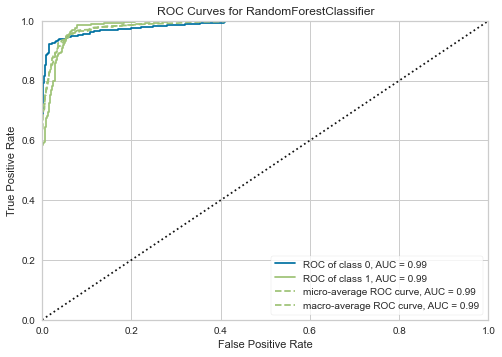

In [16]:
# Plot a Model
# AUC Plot
plot_model(tuned_rf, plot = 'auc')

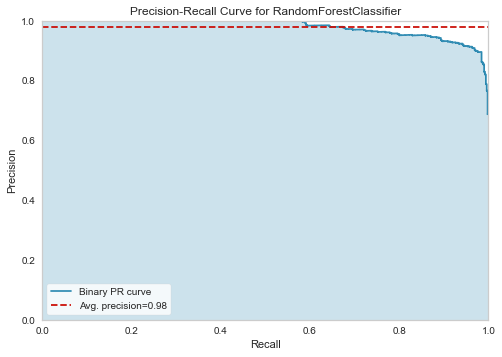

In [17]:
# Precision-Recall Curve
plot_model(tuned_rf, plot = 'pr')

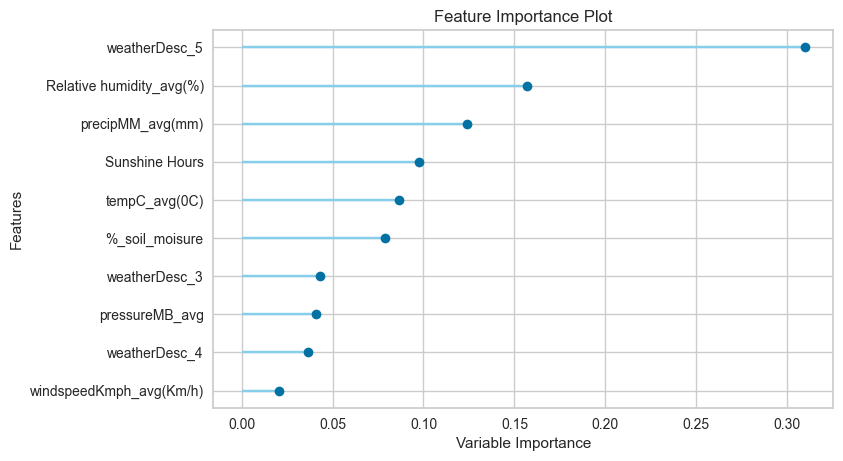

In [18]:
# Feature Importance Plot
plot_model(tuned_rf, plot='feature')

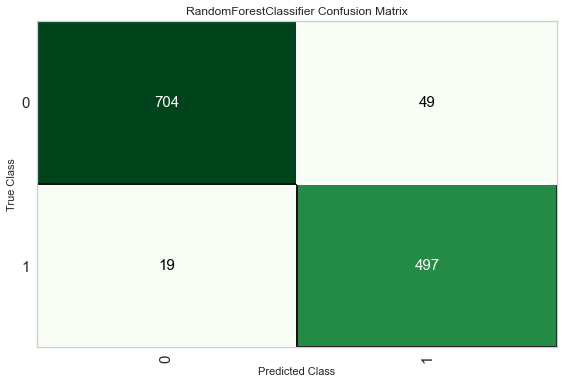

In [19]:
# Confusion Matrix
plot_model(tuned_rf, plot = 'confusion_matrix')

In [20]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [21]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9464,0.9865,0.9632,0.9103,0.9360,0.8900,0.8910


,tempC_avg(0C),Relative humidity_avg(%),windspeedKmph_avg(Km/h),pressureMB_avg,precipMM_avg(mm),Sunshine Hours,%_soil_moisure,weatherDesc_1,weatherDesc_2,weatherDesc_3,weatherDesc_4,weatherDesc_5,Label (Disease Yes/No),Label,Score
0,31.0,42.0,10.0,1006.0,0.166667,10.4,32.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9598
1,28.0,36.0,2.0,1010.0,0.000000,9.7,43.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9915
2,28.0,28.0,11.0,1011.0,0.000000,10.1,43.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6934
3,25.0,67.0,20.0,1004.0,0.633333,6.2,47.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9963
4,26.0,19.0,10.0,1011.0,0.000000,10.1,45.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,25.0,82.0,24.0,1003.0,0.166667,3.8,60.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9805
1265,24.0,84.0,15.0,1002.0,0.500000,3.8,56.0,0.0,0.0,1.0,0.0,0.0,1,1,0.8644
1266,25.0,80.0,12.0,1001.0,0.666667,6.2,65.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9867
1267,27.0,18.0,15.0,1011.0,0.000000,10.1,41.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9942


In [23]:
# saving the final model
save_model(tuned_rf,'Final RF Model 11Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Label (Disease Yes/No)',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=8, max_features='log2',
                                         